# QF 600 Asset Pricing | YU Lingfeng
## `Homework 2` | Capital Asset Pricing Model (CAPM)

### <font color = green> Activation of necessary libraries. </font>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime

from IPython.display import display
from IPython.display import Image


In [3]:
%whos

Variable   Type        Data/Info
--------------------------------
Image      type        <class 'IPython.core.display.Image'>
datetime   type        <class 'datetime.datetime'>
display    function    <function display at 0x000001E49DC99D00>
np         module      <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module      <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module      <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
stats      module      <module 'scipy.stats' fro<...>ipy\\stats\\__init__.py'>


### <font color = "blue"> `IMPORT` dataset: `Industry_Portfolios.csv`.  and `Market_Portfolio.csv` </font> 
### <font color = "blue"> Validate dataset

In [4]:
assets_file = 'Industry_Portfolios.csv'
data = pd.read_csv(assets_file)
data

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
116,201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
117,201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87
118,201311,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74


In [5]:
market_file = 'Market_Portfolio.csv'
market = pd.read_csv(market_file)
data = data.merge(market)
data

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88,2.22
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16,1.46
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63,-1.23
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76,-1.75
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,-2.69
116,201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,3.76
117,201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,4.17
118,201311,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74,3.12


In [6]:
data.isnull().sum()

Date      0
NoDur     0
Durbl     0
Manuf     0
Enrgy     0
HiTec     0
Telcm     0
Shops     0
Hlth      0
Utils     0
Other     0
Market    0
dtype: int64

In [7]:
data['Date'] = data['Date'].apply(lambda x: datetime(x // 100, x % 100, 1))

In [8]:
means = data.iloc[:,1:].mean()
means.name = 'Mean Return'
means = means.to_frame()
means.T

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
Mean Return,0.902833,0.733333,1.012833,1.231167,0.76625,0.881417,0.916333,0.783833,0.907167,0.489083,0.748083


> Question 1: Market Model


#### Question 1.1 Create a table showing the intercept and slope coefficients for the ten industry portfolios.


In [9]:
Rf = 0.13
data

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
0,2004-01-01,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88,2.22
1,2004-02-01,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16,1.46
2,2004-03-01,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63,-1.23
3,2004-04-01,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76,-1.75
4,2004-05-01,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2013-08-01,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,-2.69
116,2013-09-01,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,3.76
117,2013-10-01,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,4.17
118,2013-11-01,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74,3.12


In [10]:
Market_Model = data.copy().iloc[:,1:]-0.13
Market_Model

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
0,-0.07,-1.20,-0.75,0.31,4.40,1.28,0.32,2.96,1.79,2.75,2.09
1,4.12,-0.20,1.82,4.56,-3.05,-0.65,5.96,0.76,1.94,2.03,1.33
2,-0.22,-1.28,-0.40,-0.26,-2.68,-2.20,0.16,-4.09,1.00,-0.76,-1.36
3,1.29,2.17,-0.30,2.39,-5.04,-0.61,-2.83,3.41,-3.68,-3.89,-1.88
4,-2.02,-1.77,1.48,0.26,4.72,-3.08,0.17,-0.55,1.15,1.73,1.10
...,...,...,...,...,...,...,...,...,...,...,...
115,-4.13,-1.13,-2.08,-1.96,-0.25,-3.41,-4.34,-3.62,-4.56,-3.79,-2.82
116,1.81,6.33,5.07,1.90,3.64,4.20,4.33,4.06,0.92,3.70,3.63
117,4.62,0.59,4.43,4.73,3.67,5.39,4.95,3.34,3.22,3.74,4.04
118,1.16,1.68,2.82,0.72,3.52,0.14,3.54,4.41,-1.94,4.61,2.99


In [11]:
beta_regression = []

# Loop through the first 10 columns
for col in range(10):
    X = Market_Model.iloc[:, -1]  # Predictor variable (X)
    Y = Market_Model.iloc[:, col]  # Target variable (Y, last column)

    # Perform linear regression
    beta, alpha, r_value, p_value, std_err = stats.linregress(X, Y)

    # Store the regression results
    result = {
        'Asset': Market_Model.columns[col],
        'Slope Coefficients': beta,
        'Intercepts': alpha,
        'R-squared': r_value ** 2,
        'P-value': p_value,
        'Standard Error': std_err
    }
    beta_regression.append(result)

# Create a DataFrame from the regression results
beta_regression = pd.DataFrame(beta_regression)
beta_regression


,Asset,Slope Coefficients,Intercepts,R-squared,P-value,Standard Error
0,NoDur,0.652647,0.369443,0.717173,3.763054e-34,0.037730
1,Durbl,1.648536,-0.415599,0.732524,1.384207e-35,0.091704
2,Manuf,1.169846,0.159771,0.914649,6.691655e-65,0.032898
3,Enrgy,0.969850,0.501719,0.479307,1.991699e-18,0.093057
4,HiTec,1.132969,-0.064020,0.835429,4.658962e-48,0.046291
5,Telcm,0.900729,0.194691,0.772740,9.012327e-40,0.044967
6,Shops,0.826492,0.275492,0.768170,2.925941e-39,0.041798
7,Hlth,0.673036,0.237841,0.595218,6.329304e-25,0.051094
8,Utils,0.538086,0.444585,0.398214,1.113803e-14,0.060894
9,Other,1.207309,-0.387135,0.881489,1.752457e-56,0.040752


In [12]:
beta_regression[['Asset','Intercepts', 'Slope Coefficients']].set_index('Asset').T

Asset,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Intercepts,0.369443,-0.415599,0.159771,0.501719,-0.064020,0.194691,0.275492,0.237841,0.444585,-0.387135
Slope Coefficients,0.652647,1.648536,1.169846,0.969850,1.132969,0.900729,0.826492,0.673036,0.538086,1.207309


#### Question 1.2 Briefly explain the economic significance of the intercept and slope coefficients.


#### Ans: 
#### Intercept: The intercept coefficient on the Market Model chart basically means the systematic pricing error. If CAPM is correct, there shall not be any intercept (intercept coefficient is theoretically 0). Intercept coefficient is the main difference between CAPM and Market Model. It is an evidence showing the CAPM is not efficient to explain actual market
#### slope coefficients: basically it means risk reward ratio. It is measures how much risk premium is for a given market risk level. A higher slope coefficient in Market Model chart means higher risk premium. To note, the slope coefficients might also be negative, when describing on hedging or insurance portfolios. The slope on CAPM chart is usually referred as β

> Question 2 Security Market Line (SML)

#### Question 2. Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's. This will give you the intercept and slope coefficients for the SML.

#### Q2.1 Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis.


In [13]:
means.T

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
Mean Return,0.902833,0.733333,1.012833,1.231167,0.76625,0.881417,0.916333,0.783833,0.907167,0.489083,0.748083


In [14]:
betas = beta_regression[['Asset', 'Slope Coefficients']]\
    .set_index('Asset').T.copy() 
betas['Market'] = 1
betas.index.values[0] = "Beta"
betas

Asset,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
Beta,0.652647,1.648536,1.169846,0.96985,1.132969,0.900729,0.826492,0.673036,0.538086,1.207309,1


In [15]:
SML_points = pd.concat([means.T, betas])
SML_points

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
Mean Return,0.902833,0.733333,1.012833,1.231167,0.766250,0.881417,0.916333,0.783833,0.907167,0.489083,0.748083
Beta,0.652647,1.648536,1.169846,0.969850,1.132969,0.900729,0.826492,0.673036,0.538086,1.207309,1.000000


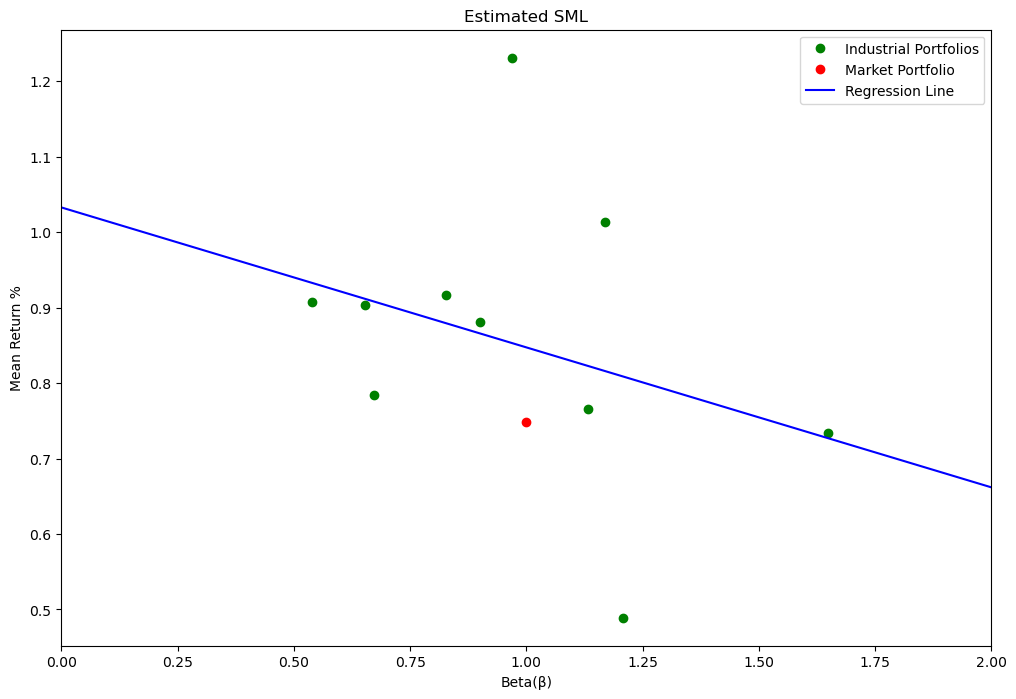

In [16]:
# Extract 'x' and 'y' data
x = SML_points.iloc[1]  # 2nd row as 'x'
y = SML_points.iloc[0]  # 1st row as 'y'
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
# Perform linear regression
Treynor, Riskless, r_value, p_value, std_err = stats.linregress(x, y)
# Create an extended x-range
x_extended = np.linspace(0, 2, 100)  # Extend the x-range from 0 to 2 (adjust as needed)

# Calculate corresponding y-values using the regression equation
y_extended = Riskless + Treynor * x_extended
# Plot the regression line
plt.plot(x[:-1], y[:-1], 'o', label='Industrial Portfolios',color='green')  # Plot the Industrial data points
plt.plot(x.iloc[-1], y.iloc[-1], 'o', label='Market Portfolio', color='red')  # Plot the Market data point
plt.plot(x_extended, y_extended, label='Regression Line', color='blue')  # Plot the extended regression line

plt.title("Estimated SML")
# Add labels and legend
plt.xlabel('Beta(β)')
plt.ylabel('Mean Return %')
plt.legend()
# Set limits on the x-axis
plt.xlim(0, 2)  # Set the x-axis limits from 0 to 2
# Show the plot
plt.show()
fig.savefig("Estimated_SML.png")

#### Q2.2 Briefly explain the economic significance of the SML.

#### Ans: 
#### 1. SML describes all available portfolios in market. In theory, all portfolios shall lie on the SML line, with different β, but same Treynor ratio. The intercepts of SML shall be the risk free rate
#### 2.	The slope, aslo referred as Treynor ratio, means the risk adjusted return, and it is supposed to be a positive number. The lager Treynor ratio is, the more attractive the portfolio becomes. A negative Treynor ratio basically means the portfolio is performing worse than the risk less asset, which might be happening during short term systematic risk period.
#### 3. For portfolio that is not lying on the SML, will automatically creates an arbitrage opportunity. For example, a point significantly above SML means for the same β, the expected return is much higher, and intuitively, rational investors would buy more, to raise the price. Thus the point will fall back on the the SML. Similiarly, the point below SML would be shorted to take profit. The SML will eventually mark the equilibrium

## QF 600 Asset Pricing | YU Lingfeng
### `Homework 2` | Capital Asset Pricing Model (CAPM) | `Submission Final`

> Question 1: Market Model

#### Question 1.1 Create a table showing the intercept and slope coefficients for the ten industry portfolios.

In [18]:
beta_regression[['Asset','Intercepts', 'Slope Coefficients']].set_index('Asset')

,Intercepts,Slope Coefficients
Asset,,
NoDur,0.369443,0.652647
Durbl,-0.415599,1.648536
Manuf,0.159771,1.169846
Enrgy,0.501719,0.969850
HiTec,-0.064020,1.132969
Telcm,0.194691,0.900729
Shops,0.275492,0.826492
Hlth,0.237841,0.673036
Utils,0.444585,0.538086


#### Question 1.2 Briefly explain the economic significance of the intercept and slope coefficients.

#### Ans: 
####  Intercept: The intercept coefficient on the Market Model chart basically means the systematic pricing error. If CAPM is correct, there shall not be any intercept (intercept coefficient is theoretically 0). Intercept coefficient is the main difference between CAPM and Market Model. It is an evidence showing the CAPM is not efficient to explain actual market
#### slope coefficients: basically it means risk reward ratio. It is measures how much risk premium is for a given market risk level. A higher slope coefficient in Market Model chart means higher risk premium. To note, the slope coefficients might also be negative, when describing on hedging or insurance portfolios

> Question 2 Security Market Line (SML).

#### Q2.1 Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis.

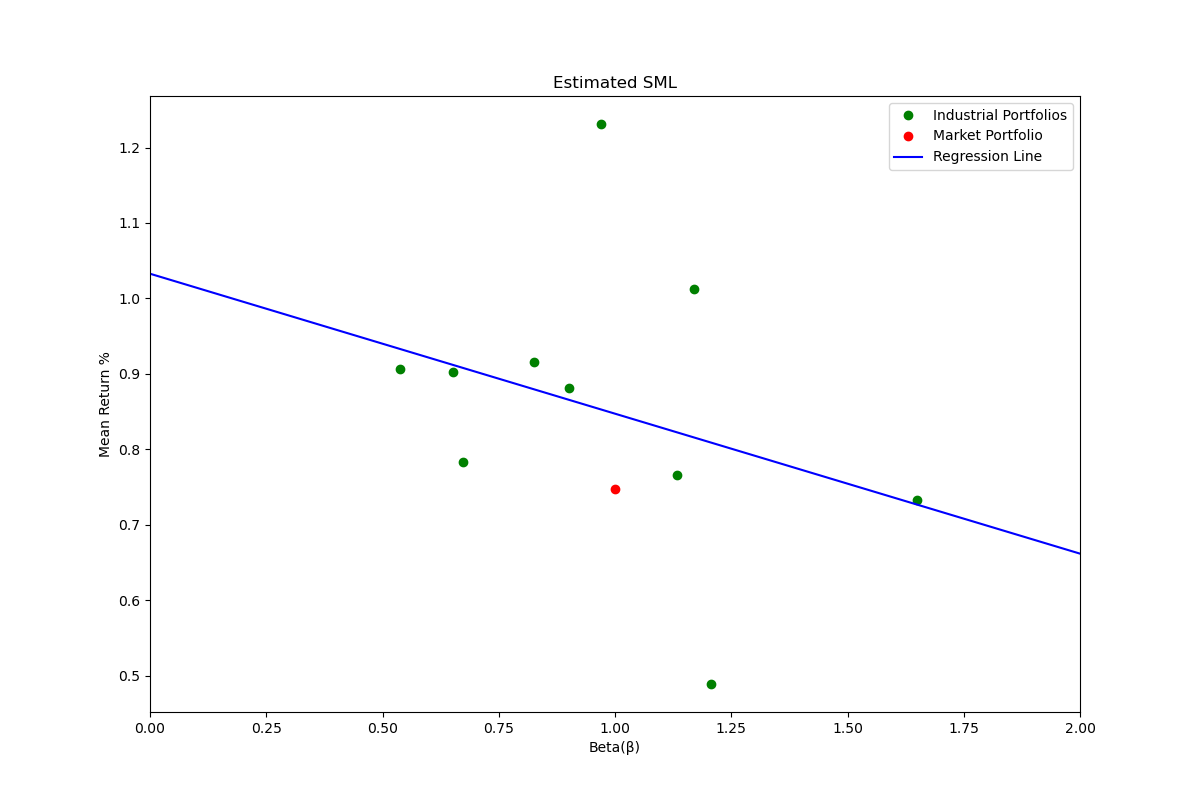

the slope on Estimated SML is -0.185467
the intercept on Estimated SML is 1.032768


In [24]:
display(Image(filename="Estimated_SML.png"))
print(f"the slope on Estimated SML is {Treynor:.6f}")
print(f"the intercept on Estimated SML is {Riskless:.6f}")

#### Q2.2 Briefly explain the economic significance of the SML.

#### Ans: 
#### 1. SML describes all available portfolios in market. In theory, all portfolios shall lie on the SML line, with different β, but same Treynor ratio. The intercepts of SML shall be the risk free rate
#### 2.	The slope, also referred as Treynor ratio, means the risk adjusted return, and it is supposed to be a positive number. The lager Treynor ratio is, the more attractive the portfolio becomes. A negative Treynor ratio basically means the portfolio is performing worse than the risk less asset, which might be happening during short term systematic risk period.
#### 3. For portfolio that is not lying on the SML, will automatically creates an arbitrage opportunity. For example, a point significantly above SML means for the same β, the expected return is much higher, and intuitively, rational investors would buy more, to raise the price. Thus the point will fall back on the the SML. Similiarly, the point below SML would be shorted to take profit. The SML will eventually mark the equilibrium